In [1]:
import pyfedwatch as fw
from pyfedwatch.datareader import read_price_history, get_fedfunds_range
from pyfedwatch.datareader import read_fomc_data, get_fomc_data
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\main.csv')

In [3]:
# Get FOMC meetings data

# Option 1: Use read_fomc_data and create a list
fomc_data_1 = read_fomc_data(path = r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\fomc')
fomc_dates_1 = fomc_data_1['FOMCDate'].to_list()

# Option 2: (Recommended) Use get_fomc_data and create a list
fomc_data_2 = get_fomc_data()
fomc_dates_2 = fomc_data_2[(fomc_data_2['Status'] == 'Scheduled') | (fomc_data_2['Status'] == 'Cancelled')].index.tolist()

In [4]:
df_fomc = fomc_data_1.copy()
fomc_data_1.head(25)

,FOMCDate,Time,Actual,Forecast,Previous
0,2024-12-18,13:00,NaN,NaN,NaN
1,2024-11-06,13:00,NaN,NaN,NaN
2,2024-09-25,13:00,NaN,NaN,NaN
3,2024-07-31,13:00,NaN,NaN,NaN
4,2024-06-19,13:00,NaN,NaN,NaN
5,2024-05-01,13:00,NaN,NaN,NaN
6,2024-03-20,13:00,NaN,NaN,NaN
7,2024-01-31,13:00,NaN,NaN,NaN
8,2023-12-13,13:00,NaN,NaN,NaN
9,2023-11-01,13:00,NaN,NaN,NaN


### Getting data out

In [5]:
df_fomc['FOMCDate'] = pd.to_datetime(df_fomc['FOMCDate'])

# Extract year, month, and the quarter
df_fomc['year'] = df_fomc['FOMCDate'].dt.year
df_fomc['month'] = df_fomc['FOMCDate'].dt.month
df_fomc['quarter'] = df_fomc['FOMCDate'].dt.quarter.apply(lambda x: f'{x}')

In [6]:
df_fomc

,FOMCDate,Time,Actual,Forecast,Previous,year,month,quarter
0,2024-12-18,13:00,NaN,NaN,NaN,2024,12,4
1,2024-11-06,13:00,NaN,NaN,NaN,2024,11,4
2,2024-09-25,13:00,NaN,NaN,NaN,2024,9,3
3,2024-07-31,13:00,NaN,NaN,NaN,2024,7,3
4,2024-06-19,13:00,NaN,NaN,NaN,2024,6,2
...,...,...,...,...,...,...,...,...
280,1983-03-31,13:00,8.62%,NaN,8.50%,1983,3,1
281,1982-12-14,13:00,8.50%,NaN,9.00%,1982,12,4
282,1982-11-19,13:00,9.00%,NaN,9.50%,1982,11,4
283,1982-10-07,13:00,9.50%,NaN,10.00%,1982,10,4


In [7]:
df_fomc.to_csv('df_fomc.csv', index=False)

- Actual and Forecastis up until (2023-02-01)
- Is Actual same as DFF They seem to be simmilar but different


In [8]:
df[['year', 'quarter', 'month', 'DFF', 'DFF_implied']].tail(10)

,year,quarter,month,DFF,DFF_implied
751,2022,3.0,8,2.33,2.3300
752,2022,3.0,9,3.08,2.5575
753,2022,4.0,10,3.08,3.0800
754,2022,4.0,11,3.83,3.7800
755,2022,4.0,12,4.33,4.1025
756,2023,1.0,1,4.33,4.3300
757,2023,1.0,2,4.57,4.5700
758,2023,1.0,3,4.83,4.6500
759,2023,2.0,4,4.83,4.8300
760,2023,2.0,5,5.08,NaN


In [9]:
fomc_dates_2

['1980-01-09',
 '1980-02-05',
 '1980-03-18',
 '1980-04-22',
 '1980-05-20',
 '1980-07-09',
 '1980-08-12',
 '1980-09-16',
 '1980-10-21',
 '1980-11-18',
 '1980-12-19',
 '1981-02-03',
 '1981-03-31',
 '1981-05-18',
 '1981-07-07',
 '1981-08-18',
 '1981-10-06',
 '1981-11-17',
 '1981-12-22',
 '1982-02-02',
 '1982-03-30',
 '1982-05-18',
 '1982-07-01',
 '1982-08-24',
 '1982-10-05',
 '1982-11-16',
 '1982-12-21',
 '1983-02-09',
 '1983-03-29',
 '1983-05-24',
 '1983-07-13',
 '1983-08-23',
 '1983-10-04',
 '1983-11-15',
 '1983-12-20',
 '1984-01-31',
 '1984-03-27',
 '1984-05-22',
 '1984-07-17',
 '1984-08-21',
 '1984-10-02',
 '1984-11-07',
 '1984-12-18',
 '1985-02-13',
 '1985-03-26',
 '1985-05-21',
 '1985-07-10',
 '1985-08-20',
 '1985-10-01',
 '1985-11-05',
 '1985-12-17',
 '1986-02-12',
 '1986-04-01',
 '1986-05-20',
 '1986-07-09',
 '1986-08-19',
 '1986-09-23',
 '1986-11-05',
 '1986-12-16',
 '1987-02-11',
 '1987-03-31',
 '1987-05-19',
 '1987-07-07',
 '1987-08-18',
 '1987-09-22',
 '1987-11-03',
 '1987-12-

In [10]:
# Get Fed Funds target rate upper and lower limits
ff_range = get_fedfunds_range()
ff_range

c:\Users\Asus\anaconda3\envs\pyfedwatch\Lib\site-packages\pyfedwatch\datareader.py:72: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ff_range['DFEDTARL'].fillna(ff_range['DFEDTAR'], inplace=True)
c:\Users\Asus\anaconda3\envs\pyfedwatch\Lib\site-packages\pyfedwatch\datareader.py:73: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

,LL,UL
Date,,
2008-12-16,0.0,0.25
2008-12-17,0.0,0.25
2008-12-18,0.0,0.25
2008-12-19,0.0,0.25
2008-12-20,0.0,0.25
...,...,...
2008-12-11,1.0,1.00
2008-12-12,1.0,1.00
2008-12-13,1.0,1.00


In [11]:
sorted_ff_range = ff_range.sort_index()


In [12]:
# sorted_ff_range[15050:]

In [13]:
sorted_ff_range.to_csv('fedwatch_ffrange.csv')

In [14]:
sorted_ff_range[sorted_ff_range.index == '2018-06-14']

,LL,UL
Date,,
2018-06-14,1.75,2.0


In [15]:
sorted_ff_range.tail(320)

,LL,UL
Date,,
2023-03-30,4.75,5.0
2023-03-31,4.75,5.0
2023-04-01,4.75,5.0
2023-04-02,4.75,5.0
2023-04-03,4.75,5.0
...,...,...
2024-02-08,5.25,5.5
2024-02-09,5.25,5.5
2024-02-10,5.25,5.5


what is LL and UL in respective to our data?

- what is openinterest
- what is volume?

In [16]:
# Read one of the fed funds futures contracts pricing data
ohlc_sample = read_price_history(symbol='ZQJ22', path= r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')
ohlc_sample

,Open,High,Low,Close,Volume,OpenInterest,Symbol
Date,,,,,,,
2019-04-30,98.1050,98.1050,98.1050,98.1050,0,0,ZQJ22
2019-05-01,98.0650,98.0650,98.0650,98.0650,0,0,ZQJ22
2019-05-02,98.0000,98.0000,98.0000,98.0000,0,0,ZQJ22
2019-05-03,98.0050,98.0050,98.0050,98.0050,0,0,ZQJ22
2019-05-06,98.0450,98.0450,98.0450,98.0450,0,0,ZQJ22
...,...,...,...,...,...,...,...
2022-04-25,99.6675,99.6700,99.6675,99.6675,6246,515693,ZQJ22
2022-04-26,99.6675,99.6725,99.6675,99.6700,14986,517171,ZQJ22
2022-04-27,99.6700,99.6725,99.6700,99.6700,2828,515175,ZQJ22


In [17]:
# Read one of the fed funds futures contracts pricing data
ohlc_sample = read_price_history(symbol='ZQJ25', path= r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')
ohlc_sample

,Open,High,Low,Close,Volume,OpenInterest,Symbol
Date,,,,,,,
2020-09-21,99.985,99.985,99.985,99.985,0,0,ZQJ25
2020-09-22,99.995,99.995,99.995,99.995,0,0,ZQJ25
2020-09-23,99.985,99.985,99.985,99.985,0,0,ZQJ25
2020-09-24,99.985,99.985,99.985,99.985,0,0,ZQJ25
2020-09-25,99.985,99.985,99.985,99.985,0,0,ZQJ25
...,...,...,...,...,...,...,...
2023-09-11,95.845,95.845,95.845,95.845,0,3,ZQJ25
2023-09-12,95.815,95.815,95.815,95.815,0,3,ZQJ25
2023-09-13,95.830,95.830,95.830,95.830,0,3,ZQJ25


In [18]:
ohlc_sample[600:650]

,Open,High,Low,Close,Volume,OpenInterest,Symbol
Date,,,,,,,
2023-02-08,96.720,96.720,96.720,96.720,0,0,ZQJ25
2023-02-09,96.705,96.705,96.705,96.705,0,0,ZQJ25
2023-02-10,96.660,96.660,96.660,96.660,0,0,ZQJ25
2023-02-13,96.640,96.640,96.640,96.640,0,0,ZQJ25
2023-02-14,96.440,96.440,96.440,96.440,0,0,ZQJ25
2023-02-15,96.395,96.395,96.395,96.395,0,0,ZQJ25
2023-02-16,96.440,96.440,96.440,96.440,0,0,ZQJ25
2023-02-17,96.465,96.465,96.465,96.465,0,0,ZQJ25
2023-02-21,96.375,96.375,96.375,96.375,0,0,ZQJ25


In [19]:
ohlc_sample[ohlc_sample.index=='2023-04-01']

,Open,High,Low,Close,Volume,OpenInterest,Symbol
Date,,,,,,,


In [20]:
# Testing FOMC class
fomc = fw.fomc.FOMC(watch_date = '1990-03-10',
                    fomc_dates = fomc_dates_2,
                    num_upcoming = 9)

fomc.summary

,Contract,Meeting,Order
YYYY-MM,,,
1990-01,ZQF90,No FOMC,0
1990-02,ZQG90,1990-02-07,-1
1990-03,ZQH90,1990-03-27,1
1990-04,ZQJ90,No FOMC,0
1990-05,ZQK90,1990-05-15,2
1990-06,ZQM90,No FOMC,0
1990-07,ZQN90,1990-07-03,3
1990-08,ZQQ90,1990-08-21,4
1990-09,ZQU90,No FOMC,0


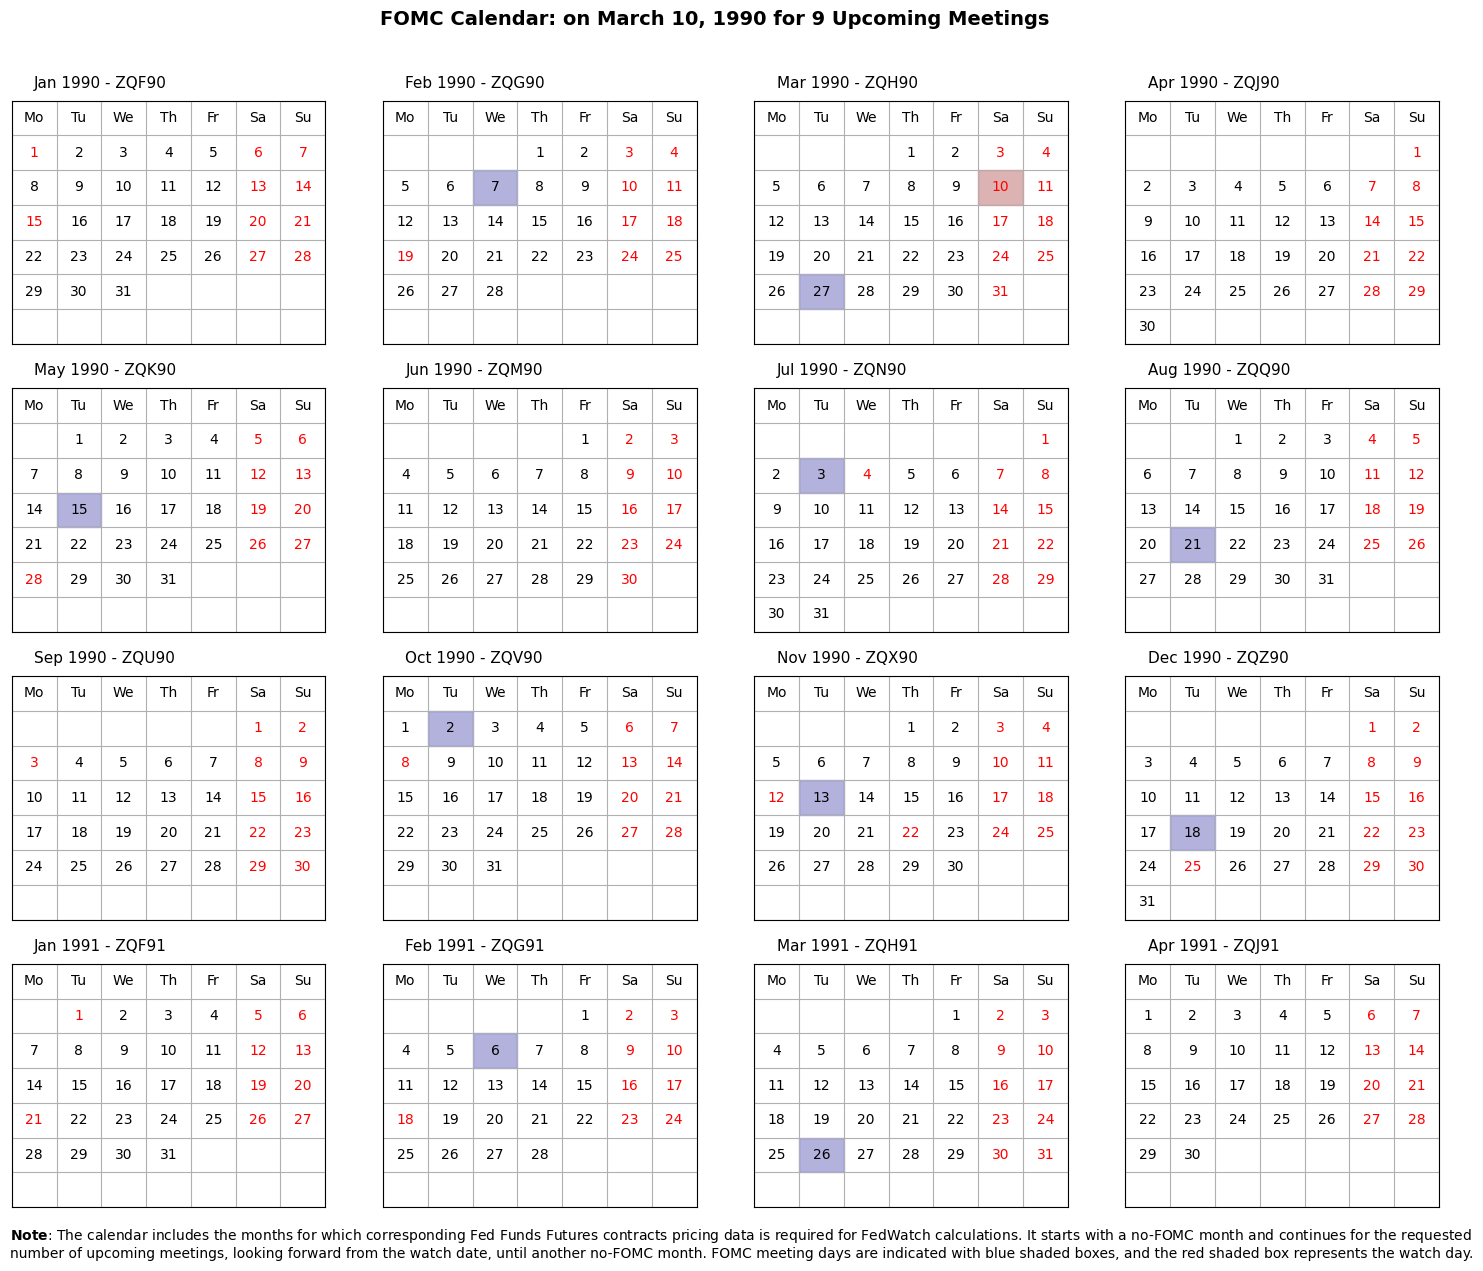

In [21]:
# Plot FOMC calendar
fig = fomc.plot_fomc_calendar()

In [28]:
# Calculate rate expectations
fedwatch = fw.fedwatch.FedWatch(watch_date = '2005-01-01',
                                fomc_dates = fomc_dates_2,
                                num_upcoming = 100,
                                user_func = read_price_history,
                                path = r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')

fedwatch.generate_hike_info(rate_cols=True).style.format("{:.1%}").background_gradient(axis=1)

IndexError: single positional indexer is out-of-bounds

: 

In [24]:
fedwatch.generate_hike_info(rate_cols=True)

2.25      2.50      2.75      3.00      3.25  \
WatchDate  FOMCDate                                                       
2005-01-01 2005-02-02  0.026667  0.973333  0.000000  0.000000  0.000000   
           2005-03-22  0.004622  0.190756  0.804622  0.000000  0.000000   
           2005-05-03  0.001023  0.045828  0.326653  0.626496  0.000000   
           2005-06-30  0.000367  0.017091  0.146538  0.434183  0.401821   
           2005-08-09  0.000176  0.008395  0.079226  0.284607  0.418649   
           2005-09-20  0.000176  0.008395  0.079226  0.284607  0.418649   
           2005-11-01  0.000176  0.008395  0.079226  0.284607  0.418649   
           2005-12-13  0.000176  0.008395  0.079226  0.284607  0.418649   
           2006-01-31  0.000176  0.008395  0.079226  0.284607  0.418649   
           2006-03-28  0.000176  0.008395  0.079226  0.284607  0.418649   
           2006-05-10  0.000176  0.008395  0.079226  0.284607  0.418649   
           2006-06-29  0.000176  0.008395  0.079226  0.284607  0.418649   
           2006-08-08  0.000176  0.008395  0.079226  0.284607  0.418649   
           2006-09-20  0.000176  0.008395  0.079226  0.284607  0.418649   
           2006-10-25  0.000176  0.008395  0.079226  0.284607  0.418649   

                           3.50  
WatchDate  FOMCDate              
2005-01-01 2005-02-02  0.000000  
           2005-03-22  0.000000  
           2005-05-03  0.000000  
           2005-06-30  0.000000  
           2005-08-09  0.208947  
           2005-09-20  0.208947  
           2005-11-01  0.208947  
           2005-12-13  0.208947  
           2006-01-31  0.208947  
           2006-03-28  0.208947  
           2006-05-10  0.208947  
           2006-06-29  0.208947  
           2006-08-08  0.208947  
           2006-09-20  0.208947  
           2006-10-25  0.208947

#########################################################

In [27]:
import pandas as pd

# Initialize variables
watch_date = '2005-01-01'
aggregated_df = pd.DataFrame()  # DataFrame to hold aggregated results
continue_loop = True

while continue_loop:
    # Initialize FedWatch with the current watch_date
    fedwatch = fw.fedwatch.FedWatch(watch_date=watch_date,
                                    fomc_dates=fomc_dates_2,
                                    num_upcoming=15,
                                    user_func=read_price_history,
                                    path=r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')
    
    # Try to generate hike info for the current batch, handle exceptions for empty or invalid data
    try:
        current_batch_df = fedwatch.generate_hike_info(rate_cols=True)
    except Exception as e:
        print(f"Error generating hike info: {e}")
        continue_loop = False
        break

    # Check if the DataFrame is not empty
    if not current_batch_df.empty:
        # Append the current batch's results to the aggregated DataFrame
        aggregated_df = pd.concat([aggregated_df, current_batch_df])

        # Check if the current batch is less than 15, indicating we've fetched all available meetings
        if len(current_batch_df) < 15:
            continue_loop = False
        else:
            # Convert the last FOMCDate from the batch to datetime, add one day, and update watch_date
            last_meeting_date = pd.to_datetime(current_batch_df.index.get_level_values('FOMCDate')[-1])
            watch_date = (last_meeting_date + pd.Timedelta(days=1)).strftime('%Y-%m-%d')
    else:
        # If the current batch is empty, stop the loop
        continue_loop = False

# Print or save aggregated_df as needed
print(aggregated_df)


Error generating hike info: single positional indexer is out-of-bounds
                           2.25      2.50      2.75      3.00      3.25  \
WatchDate  FOMCDate                                                       
2005-01-01 2005-02-02  0.026667  0.973333  0.000000  0.000000  0.000000   
           2005-03-22  0.004622  0.190756  0.804622  0.000000  0.000000   
           2005-05-03  0.001023  0.045828  0.326653  0.626496  0.000000   
           2005-06-30  0.000367  0.017091  0.146538  0.434183  0.401821   
           2005-08-09  0.000176  0.008395  0.079226  0.284607  0.418649   
           2005-09-20  0.000176  0.008395  0.079226  0.284607  0.418649   
           2005-11-01  0.000176  0.008395  0.079226  0.284607  0.418649   
           2005-12-13  0.000176  0.008395  0.079226  0.284607  0.418649   
           2006-01-31  0.000176  0.008395  0.079226  0.284607  0.418649   
           2006-03-28  0.000176  0.008395  0.079226  0.284607  0.418649   
           2006-05-10  0.0001

################################################

In [ ]:
# Initialize parameters
initial_watch_date = '2005-01-01'
final_fomc_date = '2006-10-25'  # Example final date, adjust as needed
fomc_dates_2 = fomc_dates_2  # Your list of FOMC dates
cumulative_df = pd.DataFrame()  # Initialize an empty DataFrame for cumulative results

current_watch_date = initial_watch_date

while True:
    # Create an instance of FedWatch with the current watch date
    fedwatch = fw.fedwatch.FedWatch(watch_date=current_watch_date,
                                    fomc_dates=fomc_dates_2,
                                    num_upcoming=15,
                                    user_func=read_price_history,
                                    path=r'C:\Users\Asus\Documents\GitHub\pyfedwatch\data\contracts')
    
    # Generate hike information
    hike_info_df = fedwatch.generate_hike_info(rate_cols=True)
    
    # Append the generated data to the cumulative dataset
    cumulative_df = pd.concat([cumulative_df, hike_info_df], axis=0)
    
    # Update the watch_date to the last FOMCDate in the generated dataset
    last_fomc_date = hike_info_df.index.get_level_values('FOMCDate')[-1]
    current_watch_date = str(last_fomc_date.date())
    
    # Break the loop if the last FOMCDate matches or exceeds the final FOMC date
    if last_fomc_date >= pd.to_datetime(final_fomc_date):
        break

ValueError: Invalid format for fomc_dates. It should be a list of datetime objects or a list of strings in 'yyyy-mm-dd' format.

In [ ]:
# Generate hike information as a DataFrame
hike_info = fedwatch.generate_hike_info(rate_cols=True)

# This step is primarily for display and might not be necessary for your dataset format requirement
formatted_hike_info = hike_info.applymap(lambda x: "{:.1%}".format(x))

# Convert the DataFrame into a dataset format (assuming you need a more data-centric format like dict or JSON)
dataset_format = formatted_hike_info.reset_index().to_dict(orient='records')

# Example to print the dataset in a readable format
for record in dataset_format:
    print(record)

{'WatchDate': '2017-04-30', 'FOMCDate': '2017-05-03', '0.00-0.25': '0.0%', '0.25-0.50': '0.0%', '0.50-0.75': '0.0%', '0.75-1.00': '96.7%', '1.00-1.25': '3.3%', '1.25-1.50': '0.0%', '1.50-1.75': '0.0%', '1.75-2.00': '0.0%', '2.00-2.25': '0.0%', '2.25-2.50': '0.0%', '2.50-2.75': '0.0%', '2.75-3.00': '0.0%', '3.00-3.25': '0.0%', '3.25-3.50': '0.0%', '3.50-3.75': '0.0%', '3.75-4.00': '0.0%', '4.00-4.25': '0.0%', '4.25-4.50': '0.0%', '4.50-4.75': '0.0%', '4.75-5.00': '0.0%', '5.00-5.25': '0.0%', '5.25-5.50': '0.0%', '5.50-5.75': '0.0%', '5.75-6.00': '0.0%'}
{'WatchDate': '2017-04-30', 'FOMCDate': '2017-06-14', '0.00-0.25': '0.0%', '0.25-0.50': '0.0%', '0.50-0.75': '0.0%', '0.75-1.00': '34.0%', '1.00-1.25': '63.8%', '1.25-1.50': '2.1%', '1.50-1.75': '0.0%', '1.75-2.00': '0.0%', '2.00-2.25': '0.0%', '2.25-2.50': '0.0%', '2.50-2.75': '0.0%', '2.75-3.00': '0.0%', '3.00-3.25': '0.0%', '3.25-3.50': '0.0%', '3.50-3.75': '0.0%', '3.75-4.00': '0.0%', '4.00-4.25': '0.0%', '4.25-4.50': '0.0%', '4.50-4

C:\Users\Asus\AppData\Local\Temp\ipykernel_25784\4023696890.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_hike_info = hike_info.applymap(lambda x: "{:.1%}".format(x))


In [ ]:
# Filter the DataFrame to keep only the rows where any probability value exceeds 0.8
filtered_hike_info = hike_info[hike_info.gt(0.8).any(axis=1)]

# Now format the filtered DataFrame to show probabilities as percentages
formatted_filtered_hike_info = filtered_hike_info.applymap(lambda x: "{:.1%}".format(x))

# Convert the filtered and formatted DataFrame into a dataset format
dataset_format_filtered = formatted_filtered_hike_info.reset_index().to_dict(orient='records')

# Example to print the filtered dataset in a readable format
for record in dataset_format_filtered:
    print(record)

{'WatchDate': '2023-04-30', 'FOMCDate': '2023-05-03', '2.25-2.50': '0.0%', '2.50-2.75': '0.0%', '2.75-3.00': '0.0%', '3.00-3.25': '0.0%', '3.25-3.50': '0.0%', '3.50-3.75': '0.0%', '3.75-4.00': '0.0%', '4.00-4.25': '0.0%', '4.25-4.50': '0.0%', '4.50-4.75': '0.0%', '4.75-5.00': '16.1%', '5.00-5.25': '83.9%', '5.25-5.50': '0.0%'}


C:\Users\Asus\AppData\Local\Temp\ipykernel_7552\4015126717.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_filtered_hike_info = filtered_hike_info.applymap(lambda x: "{:.1%}".format(x))


In [ ]:
dataset_format_filtered

[{'WatchDate': '2023-04-30',
  'FOMCDate': '2023-05-03',
  '2.25-2.50': '0.0%',
  '2.50-2.75': '0.0%',
  '2.75-3.00': '0.0%',
  '3.00-3.25': '0.0%',
  '3.25-3.50': '0.0%',
  '3.50-3.75': '0.0%',
  '3.75-4.00': '0.0%',
  '4.00-4.25': '0.0%',
  '4.25-4.50': '0.0%',
  '4.50-4.75': '0.0%',
  '4.75-5.00': '16.1%',
  '5.00-5.25': '83.9%',
  '5.25-5.50': '0.0%'}]

In [ ]:
dataset_format

[{'WatchDate': '2023-04-30',
  'FOMCDate': '2023-05-03',
  '2.25-2.50': '0.0%',
  '2.50-2.75': '0.0%',
  '2.75-3.00': '0.0%',
  '3.00-3.25': '0.0%',
  '3.25-3.50': '0.0%',
  '3.50-3.75': '0.0%',
  '3.75-4.00': '0.0%',
  '4.00-4.25': '0.0%',
  '4.25-4.50': '0.0%',
  '4.50-4.75': '0.0%',
  '4.75-5.00': '16.1%',
  '5.00-5.25': '83.9%',
  '5.25-5.50': '0.0%'},
 {'WatchDate': '2023-04-30',
  'FOMCDate': '2023-06-14',
  '2.25-2.50': '0.0%',
  '2.50-2.75': '0.0%',
  '2.75-3.00': '0.0%',
  '3.00-3.25': '0.0%',
  '3.25-3.50': '0.0%',
  '3.50-3.75': '0.0%',
  '3.75-4.00': '0.0%',
  '4.00-4.25': '0.0%',
  '4.25-4.50': '0.0%',
  '4.50-4.75': '0.0%',
  '4.75-5.00': '11.5%',
  '5.00-5.25': '64.6%',
  '5.25-5.50': '23.9%'},
 {'WatchDate': '2023-04-30',
  'FOMCDate': '2023-07-26',
  '2.25-2.50': '0.0%',
  '2.50-2.75': '0.0%',
  '2.75-3.00': '0.0%',
  '3.00-3.25': '0.0%',
  '3.25-3.50': '0.0%',
  '3.50-3.75': '0.0%',
  '3.75-4.00': '0.0%',
  '4.00-4.25': '0.0%',
  '4.25-4.50': '0.0%',
  '4.50-4.75': '2